<a target="_blank" href="https://colab.research.google.com/github/Abir-Tx/cvpr/blob/main/mid_term/jupyter_notebooks/task1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Task 1  - CVPR

## Imports

In [12]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
from tqdm import tqdm

## Download the dataset

In [14]:
dataset_url = "https://github.com/YoongiKim/CIFAR-10-images/archive/refs/heads/master.zip"
downloaded_file = "dataset.zip"

if not os.path.exists(downloaded_file):
    response = requests.get(dataset_url, stream=True)
    total_size = int(response.headers.get('content-length', 0))

    with open(downloaded_file, "wb") as f, tqdm(
        unit="B", unit_scale=True, unit_divisor=1024, total=total_size
    ) as pbar:
        for data in response.iter_content(chunk_size=1024):
            f.write(data)
            pbar.update(len(data))

    print("Dataset downloaded successfully.")

    with zipfile.ZipFile(downloaded_file, "r") as zip_ref:
        zip_ref.extractall("unpacked_dataset")  # Replace with the desired folder name
    print("Dataset unzipped.")
else:
    print("Dataset already exists. No need to download again.")

53.2MB [00:47, 1.17MB/s]


Dataset downloaded successfully.
Dataset unzipped.


## Preprocessing - Convert To Greyscale

In [23]:
TEST_DIR = 'unpacked_dataset/CIFAR-10-images-master/test'
TRAIN_DIR = 'unpacked_dataset/CIFAR-10-images-master/train'

CATEGORIES = [entry.name for entry in os.scandir(TEST_DIR) if entry.is_dir()]
print(CATEGORIES)


['cat', 'ship', 'deer', 'truck', 'horse', 'bird', 'dog', 'frog', 'airplane', 'automobile']


In [28]:
TRAIN_DATA = []

for category in CATEGORIES:
    category_path = os.path.join(TRAIN_DIR, category)
    class_index = CATEGORIES.index(category)

    for image_file in tqdm(os.listdir(category_path)):
        image_path = os.path.join(category_path, image_file)
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        TRAIN_DATA.append([image_array, class_index])

print("Appending the images to the image array done")

100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [
100%|█| 5000/5000 [

Appending the images to the image array done


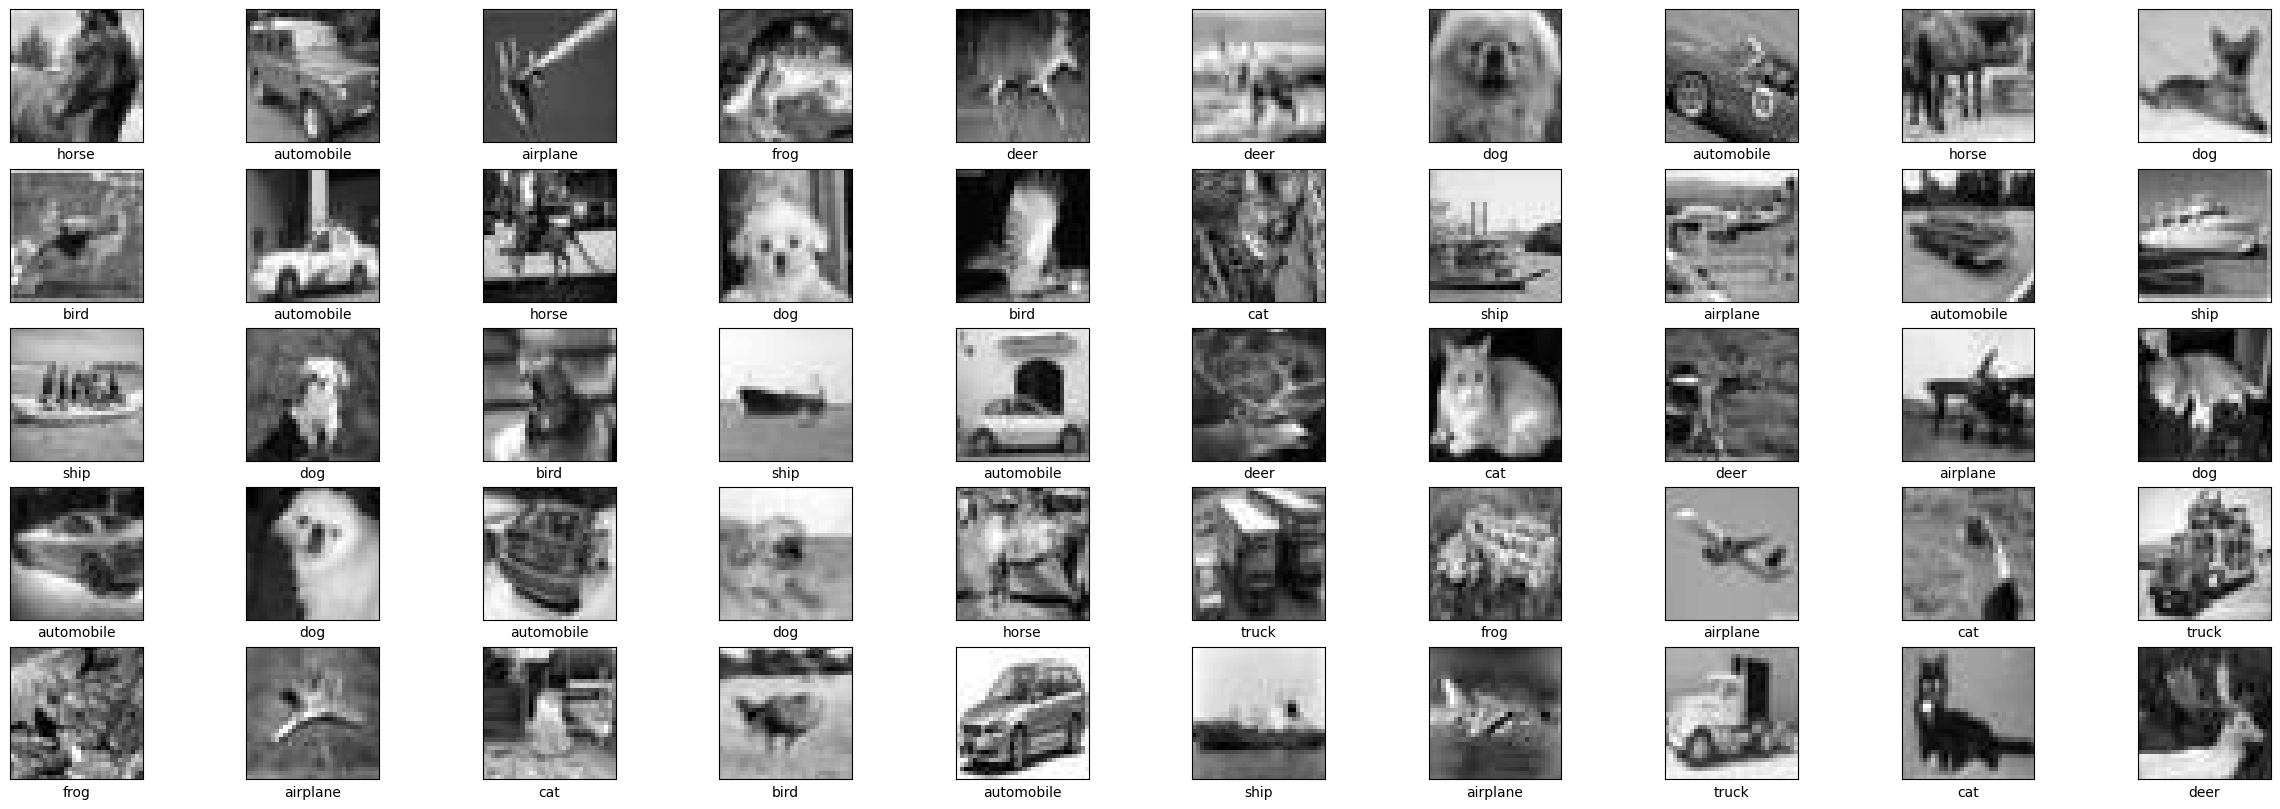

In [37]:
## Randomizing the data
random.shuffle(TRAIN_DATA)


# Plotting the first 50 images
plt.figure(figsize=(30, 10))
for i, (image, class_index) in enumerate(TRAIN_DATA[:50]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.xlabel(CATEGORIES[class_index])
    plt.xticks([])
    plt.yticks([])

plt.show()